In [1]:
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from keras.models import Sequential
from keras.layers import Dense
from keras.applications.vgg16 import VGG16

import matplotlib.pyplot as plt
from glob import glob

Using TensorFlow backend.


In [2]:
train_path = "fruits-360/Training/"
test_path = "fruits-360/Test/"

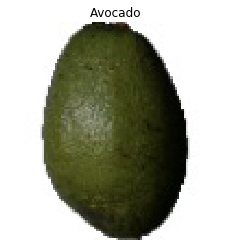

In [3]:
img = load_img(train_path + "Avocado/0_100.jpg")

plt.imshow(img)
plt.axis("off")
plt.title("Avocado")
plt.show()

In [4]:
x = img_to_array(img)

print(x.shape)

(100, 100, 3)


In [6]:
numberOfClass = len(glob(train_path + "/*"))

print(numberOfClass)

103


In [7]:
vgg = VGG16()

Instructions for updating:
Colocations handled automatically by placer.
553467904/553467096 [==============================] - 587s 1us/step


In [8]:
print(vgg.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [9]:
print(type(vgg))

<class 'keras.engine.training.Model'>


In [11]:
vgg_layer_list = vgg.layers

vgg_layer_list

In [13]:
len(vgg_layer_list)

23

In [14]:
vgg_layer_list[-1]

In [15]:
model = Sequential()

for i in range(len(vgg_layer_list)-1):
    model.add(vgg_layer_list[i])

In [16]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)       295168    
__________

In [17]:
model.layers

In [18]:
for layers in model.layers:
    layers.trainable = False

In [19]:
model.add(Dense(numberOfClass, activation="softmax"))

print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)       295168    
__________

In [20]:
model.compile(loss = "categorical_crossentropy",
              optimizer = "rmsprop",
              metrics = ["accuracy"])

In [21]:
train_data = ImageDataGenerator().flow_from_directory(train_path,target_size = (224,224))

test_data = ImageDataGenerator().flow_from_directory(test_path,target_size = (224,224))

Found 53177 images belonging to 103 classes.
Found 17845 images belonging to 103 classes.


In [22]:
batch_size = 32

In [23]:
hist = model.fit_generator(train_data,
                           steps_per_epoch=1600//batch_size,
                           epochs= 25,
                           validation_data=test_data,
                           validation_steps= 800//batch_size)

Instructions for updating:
Use tf.cast instead.
Epoch 1/25
50/50 [==============================] - 65s 1s/step - loss: 4.4703 - acc: 0.4206 - val_loss: 2.0640 - val_acc: 0.6625
Epoch 2/25
50/50 [==============================] - 35s 695ms/step - loss: 1.7137 - acc: 0.7638 - val_loss: 1.4123 - val_acc: 0.8013
Epoch 3/25
50/50 [==============================] - 38s 751ms/step - loss: 1.2074 - acc: 0.8612 - val_loss: 1.3822 - val_acc: 0.8200
Epoch 4/25
50/50 [==============================] - 39s 784ms/step - loss: 1.1523 - acc: 0.8838 - val_loss: 1.2017 - val_acc: 0.8712
Epoch 5/25
50/50 [==============================] - 35s 708ms/step - loss: 1.1825 - acc: 0.8931 - val_loss: 1.3641 - val_acc: 0.8525
Epoch 6/25
50/50 [==============================] - 35s 699ms/step - loss: 1.2594 - acc: 0.8988 - val_loss: 1.2146 - val_acc: 0.8725
Epoch 7/25
50/50 [==============================] - 36s 714ms/step - loss: 1.0659 - acc: 0.9100 - val_loss: 1.4797 - val_acc: 0.8425
Epoch 8/25
50/50 [======

In [24]:
model.save_weights("furit_vgg16_model.h5")

In [25]:
print(hist.history.keys())

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


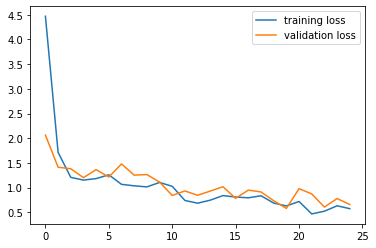

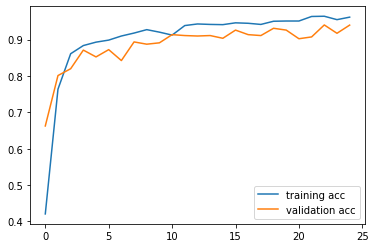

In [26]:
plt.plot(hist.history["loss"],label = "training loss")
plt.plot(hist.history["val_loss"],label = "validation loss")
plt.legend()
plt.show()
plt.figure()

plt.plot(hist.history["acc"],label = "training acc")
plt.plot(hist.history["val_acc"],label = "validation acc")
plt.legend()
plt.show()

In [28]:
#save history

import json, codecs
with open("hist_fruit.json","w") as f:
    json.dump(hist.history,f)